In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA retreived from "疾病管制署：新聞稿，每日死亡"
# CODING: EGG-HUANG.

# Load DATA
# Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
data_0527 = pd.read_excel('COVID-19_Taiwan_CDC_Death_0527-0603.xlsx', sheet_name='0527')
data_0528 = pd.read_excel('COVID-19_Taiwan_CDC_Death_0527-0603.xlsx', sheet_name='0528')
data_0529 = pd.read_excel('COVID-19_Taiwan_CDC_Death_0527-0603.xlsx', sheet_name='0529')
data_0530 = pd.read_excel('COVID-19_Taiwan_CDC_Death_0527-0603.xlsx', sheet_name='0530')
data_0601 = pd.read_excel('COVID-19_Taiwan_CDC_Death_0527-0603.xlsx', sheet_name='0601')
data_0602 = pd.read_excel('COVID-19_Taiwan_CDC_Death_0527-0603.xlsx', sheet_name='0602')
data_0603 = pd.read_excel('COVID-19_Taiwan_CDC_Death_0527-0603.xlsx', sheet_name='0603')
#DATA NAME = pd.read_excel('FILE NAME', sheet_name='SHEET NAME')

# Check point
# print('info: \n', data_0527.info()) #info 可以了解數據
# print('head: 節錄前面 \n', data_0527.head()) #head 可以只先節錄前面

# Combine, vertically
data_0527_to_0603 = pd.concat([data_0527, data_0528, data_0529, 
                               data_0530, data_0601, data_0602, data_0603]).reset_index(drop=True)

# Check point
print('info: \n', data_0527_to_0603.info()) #info 可以了解數據
print('head: 節錄前面 \n', data_0527_to_0603.head(20)) #head 可以只先節錄前面


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Number          105 non-null    int64         
 1   Gender          105 non-null    int64         
 2   age             105 non-null    int64         
 3   Confirmed       105 non-null    int64         
 4   Onset           100 non-null    datetime64[ns]
 5   Exam            97 non-null     datetime64[ns]
 6   Admission       94 non-null     datetime64[ns]
 7   Confirmed.1     104 non-null    datetime64[ns]
 8   Death           105 non-null    datetime64[ns]
 9   CAD             105 non-null    int64         
 10  HTN             105 non-null    int64         
 11  DM              105 non-null    int64         
 12  COPD_or_Asthma  104 non-null    float64       
 13  Cancer          104 non-null    float64       
 14  CKD             105 non-null    int64         
dtypes: dat

                    Disease   average
CAD                     CAD  0.257143
HTN                     HTN  0.466667
DM                       DM  0.380952
COPD_or_Asthma  COPD/Asthma  0.125000
Cancer               Cancer  0.067308
CKD                     CKD  0.190476
AxesSubplot(0.125,0.125;0.775x0.755)


<ipython-input-2-4ad04459b989>:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data_mean = data_0527_to_0603.mean(axis=0) #axis=0 vertical, axis=1: horizontal
<ipython-input-2-4ad04459b989>:16: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  'average': data_0527_to_0603.mean(axis=0).iloc[4:10]})


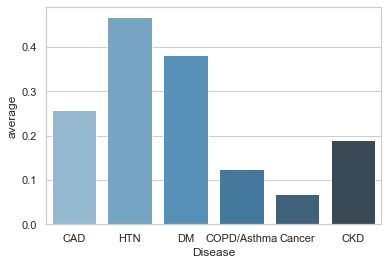

In [2]:
"""
Q1 有沒有哪個慢性病和死亡比較相關
"""

# Correlation, method: pearson correlation
#data_corr = data_0527_to_0603[['Confirmed','CAD','HTN','DM','COPD_or_Asthma','Cancer','CKD']].corr(method='pearson')
#print('correlation table: \n', data_corr, '\n\n')

# Mean
data_mean = data_0527_to_0603.mean(axis=0) #axis=0 vertical, axis=1: horizontal
data_mean_dz = data_mean.iloc[4:10] #only pick 4~9
# p.s. curretnly: data_mean_dz type belongs to "series"

# Set the Frame
mean_chart = pd.DataFrame({'Disease': ['CAD','HTN','DM','COPD/Asthma','Cancer','CKD'],
                           'average': data_0527_to_0603.mean(axis=0).iloc[4:10]})
print(mean_chart)

# plot bar
# Ref: https://seaborn.pydata.org/generated/seaborn.barplot.html

sns.set_theme(style="whitegrid")
#barplot = sns.barplot(x='Disease', y='average', data=mean_chart)

#Use a different color palette for the bars:
Mean_bar = sns.barplot(x='Disease', y='average', data=mean_chart, palette='Blues_d')
print(Mean_bar)


In [60]:
"""
Q2 確診年齡 vs. 死亡時間的圖
"""

#lineplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data: data_0527_to_0603
# Re-construct the table, pivot_table (age-death death-amount)
# 重新組織資料! 最靈活好運用: .pivot_table(index：新資料的索引名稱, columns：新資料的欄位名稱, values：新資料的值名稱)
# Columns类似Index可以设置列层次字段，它不是一个必要参数，作为一种分割数据的可选方式。
# fill_value=0, 沒有用 0帶入

# 依照 death 日期排列, death 統計
data_death = pd.pivot_table(data_0527_to_0603, index=['age'], values=['Death'], aggfunc=['count'], fill_value=0)
# Check point
print('info: \n', data_death.info()) #info 可以了解數據
print('head: death 統計 \n', data_death.head(10)) #head 可以只先節錄前面


# Death and age
data_death_age = pd.pivot_table(data_0527_to_0603, 
                                index=['age'], 
                                columns=['Death'], 
                                values=['Confirmed'], 
                                aggfunc=['count'],
                                fill_value=0)

# Check point
print('info: \n', data_death_age.info()) #info 可以了解數據
print('head: death ange age \n', data_death_age.head(10)) #head 可以只先節錄前面


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 30 to 90
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   (count, Death)  7 non-null      int64
dtypes: int64(1)
memory usage: 112.0 bytes
info: 
 None
head: death 統計 
     count
    Death
age      
30      1
40      3
50      6
60     30
70     36
80     22
90      7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 30 to 90
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   (count, Confirmed, 2021-05-21 00:00:00)  7 non-null      int64
 1   (count, Confirmed, 2021-05-22 00:00:00)  7 non-null      int64
 2   (count, Confirmed, 2021-05-23 00:00:00)  7 non-null      int64
 3   (count, Confirmed, 2021-05-24 00:00:00)  7 non-null      int64
 4   (count, Confirmed, 2021-05-25 00:00:00)  7 non-null      int64
 5   (count, Conf

In [78]:
# lineplot 折線圖
# sns.set(style="whitegrid")
# sns.relplot(data=data_death_age, x='Confirmed', y="Death", kind='line', hue="age")